In [1]:
import numpy as np
import pandas as pd

from numpy import linalg

import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [2]:
songs_df = pd.read_csv("data/song_data.csv")
users_df = pd.read_csv("data/10000.txt", delim_whitespace=True)

In [3]:
songs_df.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [4]:
users_df.head()

,user_id,song_id,num_listens
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


# Exploratory Analysis

In [5]:
user_id = list(users_df['user_id'])
song_id = list(users_df['song_id'])
unique_songs = list(set(song_id))
num_listens = list(users_df['num_listens'])
print(len(set(user_id)), "unique users")
print(len(unique_songs), "unique songs")
print(sum(num_listens), "total song listens")

76353 unique users
10000 unique songs
6090969 total song listens


In [6]:
# check top 10 songs that are most listened to 
most_listened = users_df[['song_id', 'num_listens']].groupby('song_id').sum().sort_values('num_listens', ascending=False).head(10)
top_songs = list(most_listened.index)
listen_count = list(most_listened['num_listens'])
top_ten=pd.DataFrame(top_songs,columns=["song_id"])
top_ten['num_listens']=listen_count
song_names=[]
for i in range(0,10):
    song_name = songs_df.loc[songs_df['song_id'] == top_songs[i]]['title']
    song_names.append(list(song_name)[0])
#     print(list(song_name)[0], "has been listened to", listen_count[i], "times")
    
top_ten['song_name']=song_names
top_ten.head(10)

,song_id,num_listens,song_name
0,SOBONKR12A58A7A7E0,54136,You're The One
1,SOAUWYT12A81C206F1,49253,Undo
2,SOSXLTC12AF72A7F54,41418,Revelry
3,SOEGIYH12A6D4FC0E3,31153,Horn Concerto No. 4 in E flat K495: II. Romanc...
4,SOFRQTD12A81C233C0,31036,Sehr kosmisch
5,SOAXGDH12A8C13F8A1,26663,Dog Days Are Over (Radio Edit)
6,SONYKOW12AB01849C9,22100,Secrets
7,SOPUCYA12A8C13A694,21019,Canada
8,SOUFTBI12AB0183F65,19645,Invalid
9,SOVDSJC12A58A7A271,18309,Ain't Misbehavin


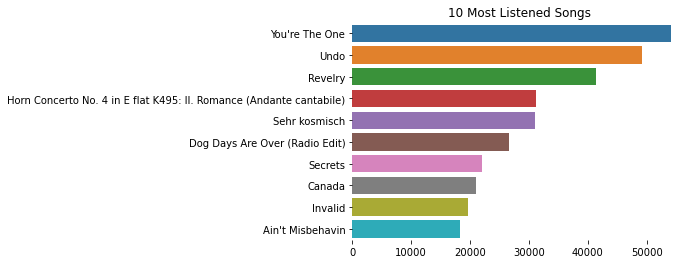

In [7]:
labels=top_ten['song_name'].tolist()
num_listened=top_ten['num_listens'].tolist()

plt.figure()
sns.barplot(x=num_listened,y=labels).set(title='10 Most Listened Songs')
sns.despine(left=True,bottom=True)

In [8]:
# check top 10 users with most listens
most_listened_users = users_df[['user_id', 'num_listens']].groupby('user_id').sum().sort_values('num_listens', ascending=False)
top_users = list(most_listened_users.index)
listen_count = list(most_listened_users['num_listens'])
print("AVERAGE LISTEN COUNT", np.mean(listen_count))
for i in range(0,10):
    print(top_users[i], "has", listen_count[i], "song listens")

AVERAGE LISTEN COUNT 79.77380063651722
4be305e02f4e72dad1b8ac78e630403543bab994 has 4426 song listens
6d625c6557df84b60d90426c0116138b617b9449 has 3482 song listens
d13609d62db6df876d3cc388225478618bb7b912 has 2686 song listens
0b19fe0fad7ca85693846f7dad047c449784647e has 2679 song listens
283882c3d18ff2ad0e17124002ec02b847d06e9a has 2306 song listens
083a2a59603a605275107c00812a811526c2a0af has 2142 song listens
6a944bfe30ae8d6b873139e8305ae131f1607d5f has 2062 song listens
5ea608df0357ec4fda191cb9316fe8e6e65e3777 has 2032 song listens
9c859962257112ad523f1d3c121d35191daa6d2b has 2032 song listens
2231cb435771a1a621ec44e95cdd28b81fad3288 has 2019 song listens


In [9]:
# check songs with most listens per individual user
sorted_listens = np.sort(list(users_df['num_listens']))
most_listened = sorted_listens[-1]
most_listened_id = list(users_df.loc[users_df['num_listens'] == most_listened]['song_id'])[0]
most_listened_name = list(songs_df.loc[songs_df['song_id'] == most_listened_id]['title'])[0]
print("A single user has listened to", most_listened_name, most_listened, "times")

A single user has listened to Starshine 2213 times


In [10]:
# function to return song name and author from an input id
def get_song(song_id):
    row = songs_df.loc[songs_df['song_id'] == song_id]
    row = str(list(row['title'] + " by " + row['artist_name'])[0])
    return row

# Collaborative Filtering

In [11]:
# function to return a listening history dictionary based on the number of users passed into it - takes ~2hrs for full dataset so will be working with partitions
def get_listening_history(num_users):
    listening_history = {}
    unique_users = list(set(user_id))
    for i in range(0, num_users):
        user = unique_users[i]
        # get listening history for a single user
        temp_df = users_df[users_df['user_id'] == user]
        # zip lists into a tuple and add to dictionary
        listening_history[user] = list(zip(list(temp_df['song_id']), list(temp_df['num_listens'])))
    return listening_history

# function to print a listening history given the list of tuples
def print_listening_history(user):
    user = list(zip(*user))
    songs = user[0]
    count = user[1]
    for i in range (0, len(songs)):
        print(get_song(songs[i]), "listened to", count[i], "time(s)")

In [12]:
# listening_history_10 = get_listening_history(10)
listening_history_100 = get_listening_history(100)
# listening_history_1000 = get_listening_history(1000)
# listening_history_10000 = get_listening_history(10000)

In [13]:
# function that accurately formats the data from two users and returns a similarity score - user1, user2 passed in as a list of tuples (song_id, listen_count)
def get_similarity(user1, user2, normalize):
    # convert user1, user2 lists
    user1 = list(zip(*user1))
    songs_user1 = user1[0]
    count_user1 = user1[1]
    user2 = list(zip(*user2))
    songs_user2 = user2[0]
    count_user2 = user2[1]

    # get unique songs and convert each listening history to a list of integers - 0 if they haven't listened to the song
    listening_history1 = np.zeros(len(unique_songs))
    listening_history2 = np.zeros(len(unique_songs))
    for index, song_id in enumerate(unique_songs):
        if song_id in songs_user1:
            song_index = songs_user1.index(song_id)
            listening_history1[index] = count_user1[song_index]
        if song_id in songs_user2:
            song_index = songs_user2.index(song_id)
            listening_history2[index] = count_user2[song_index]
            
    # normalize before simiilarity if the boolean is passed
    if normalize == True:
        # find means
        mu1 = np.mean(count_user1)
        mu2 = np.mean(count_user2)
        # subtract means from all non-zero counts
        for i in range (0, len(listening_history1)):
            if listening_history1[i] != 0: listening_history1[i] -= mu1
            if listening_history2[i] != 0: listening_history2[i] -= mu2
                
    # calculate the cosine similarity between the two listening histories
    if (np.linalg.norm(listening_history1, ord = 2) == 0 or np.linalg.norm(listening_history2, ord = 2) == 0):
        return 0
    else:
        similarity = np.dot(listening_history1, listening_history2) / (np.linalg.norm(listening_history1, ord = 2) * np.linalg.norm(listening_history2, ord = 2))
        return similarity

In [14]:
# check highest similarity for user 1
user_id1 = list(listening_history_100.keys())[17]
user1 = listening_history_100[user_id1]
similarities = []
for i in listening_history_100:
    user2 = listening_history_100[i]
    if user1 != user2:
        similarities.append(get_similarity(user1, user2, False))
    else:
        similarities.append(0)
max_index = np.argmax(similarities)
similar_user = listening_history_100[list(listening_history_100)[max_index]]

print(max(similarities))
print("USER 1")
print("------------------------------------------------------")
print_listening_history(user1)
print("MOST SIMILAR USER")
print("------------------------------------------------------")
print_listening_history(similar_user)

0.03166237934306518
USER 1
------------------------------------------------------
You And Me Jesus by Jake Hess listened to 1 time(s)
Sorry (Album Version) by Buckcherry listened to 2 time(s)
Gives You Hell by The All-American Rejects listened to 1 time(s)
Riot Of Violence by Kreator listened to 8 time(s)
Crumpshit by Philippe Rochard listened to 3 time(s)
The Real Slim Shady by Eminem listened to 1 time(s)
All Hands Against His Own by The Black Keys listened to 3 time(s)
Hailie's Song by Eminem listened to 1 time(s)
Almaz by Randy Crawford listened to 2 time(s)
Breathe (2 AM) by Anna Nalick listened to 1 time(s)
MOST SIMILAR USER
------------------------------------------------------
Halo by Beyoncé listened to 2 time(s)
Hips Don't Lie (featuring Wyclef Jean) by Shakira Featuring Wyclef Jean listened to 1 time(s)
Sehr kosmisch by Harmonia listened to 3 time(s)
Gives You Hell by The All-American Rejects listened to 2 time(s)
These Four Walls by Miley Cyrus listened to 1 time(s)
See You

In [15]:
# pass a user_id and return the user_id of the most similar user 
def find_most_similar(user_id, listening_history):
    user = listening_history[user_id]
    similarities = []
    for i in listening_history:
        cur_user = listening_history[i]
        if user != cur_user:
            similarities.append(get_similarity(user, cur_user, False))
        else:
            similarities.append(0)
    max_index = np.argmax(similarities)
    similar_user = list(listening_history)[max_index]
    return similar_user

# pass in both users (user_id) listening histories and recommend the most listened songs that haven't been listened to by user1
def user_user_recommendation(user1, user2, listening_history):
    # extract songs and listen counts
    user1 = listening_history[user1]
    user2 = listening_history[user2]
    user1 = list(zip(*user1))
    user2 = list(zip(*user2))
    songs1 = user1[0]
    songs2 = user2[0]
    num_listens1 = user1[1]
    num_listens2 = user2[1]
    
    # loop through listening history of user 2 and find songs user 1 hasn't listened to
    recommend_dict = {}
    for index, song in enumerate(songs2):
        if song not in songs1: recommend_dict[song] = num_listens2[index]
            
    # sort by value and return as list of songs
    recommend_dict = dict(sorted(recommend_dict.items(), key=lambda item: item[1], reverse = True))
    return list(recommend_dict.keys())

In [16]:
# collaborative filter function to put it all together and return k recommendations based of most similar user
def collaborative_filter(user_id, listening_history, k):
    # find most similar user
    similar_user_id = find_most_similar(user_id, listening_history)
    
    # use similar user to get recommendation dictionary
    recommendations = user_user_recommendation(user_id, similar_user_id, listening_history)
    
    # provide info on the user 
    print("Listening history for user:", user_id)
    print("------------------------------------")
    print_listening_history(listening_history[user_id])
    print("------------------------------------")
    # print top k recommendations
    if k > len(recommendations):
        k = len(recommendations)
        print("Value for k is too large. Printing", k, "recommendations instead")
    print("Recommendations for user:", user_id)
    print("------------------------------------")
    for i in range(0,k):
        song_name = get_song(recommendations[i])
        print(i + 1, ":", song_name)
    print("------------------------------------")

In [17]:
collaborative_filter(user_id1, listening_history_100, 5)

Listening history for user: 36e13c9499f6fdafd251baeeeca39a429f12a34e
------------------------------------
You And Me Jesus by Jake Hess listened to 1 time(s)
Sorry (Album Version) by Buckcherry listened to 2 time(s)
Gives You Hell by The All-American Rejects listened to 1 time(s)
Riot Of Violence by Kreator listened to 8 time(s)
Crumpshit by Philippe Rochard listened to 3 time(s)
The Real Slim Shady by Eminem listened to 1 time(s)
All Hands Against His Own by The Black Keys listened to 3 time(s)
Hailie's Song by Eminem listened to 1 time(s)
Almaz by Randy Crawford listened to 2 time(s)
Breathe (2 AM) by Anna Nalick listened to 1 time(s)
------------------------------------
Recommendations for user: 36e13c9499f6fdafd251baeeeca39a429f12a34e
------------------------------------
1 : Sehr kosmisch by Harmonia
2 : Drop The World by Lil Wayne / Eminem
3 : Halo by Beyoncé
4 : Live And Let Die by Guns N' Roses
5 : Pursuit Of Happiness (nightmare) by Kid Cudi / MGMT / Ratatat
-------------------